In [1]:
from scipy.io import loadmat

data = loadmat("concatenated_1000ms_from250_speed10_bin100.mat")
features = data["features"]
position = data["position"]

print features.shape, position.shape

(12600L, 76L) (12600L, 2L)


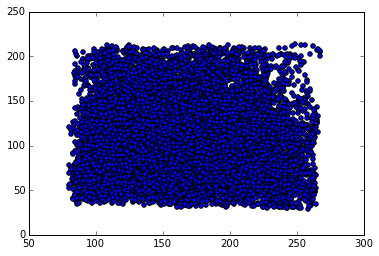

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(position[...,0], position[...,1])

In [3]:
nr_samples = features.shape[0]
nr_train = int(0.8 * nr_samples)
nr_test = nr_samples - nr_train

train_X = features[:nr_train]
train_Y = position[:nr_train]
test_X = features[nr_train:]
test_Y = position[nr_train:]

print train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

(10080L, 76L) (10080L, 2L) (2520L, 76L) (2520L, 2L)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X.astype('float'))
test_X_scaled = scaler.transform(test_X.astype('float'))

In [18]:
from sklearn.svm import LinearSVR
from sklearn.grid_search import GridSearchCV

tuned_parameters = [{'C': [1, 10, 100, 1000]}]

cvx = GridSearchCV(LinearSVR(), tuned_parameters, cv=5)
cvx.fit(train_X_scaled, train_Y[...,0])
print cvx.best_params_, cvx.best_score_

cvy = GridSearchCV(LinearSVR(), tuned_parameters, cv=5)
cvy.fit(train_X_scaled, train_Y[...,1])
print cvy.best_params_, cvy.best_score_

{'C': 100} 0.327361612138
{'C': 10} 0.405290338079


In [15]:
def mean_distance(pred_Y, test_Y):
    return np.mean(np.sqrt(np.sum((pred_Y - test_Y) ** 2, axis=1)))

In [19]:
import numpy as np

train_pred_Y = np.hstack((cvx.predict(train_X_scaled)[:,np.newaxis], cvy.predict(train_X_scaled)[:,np.newaxis]))
test_pred_Y = np.hstack((cvx.predict(test_X_scaled)[:,np.newaxis], cvy.predict(test_X_scaled)[:,np.newaxis]))

print "Train mean distance %f, test mean distance: %f, test R^2 score %f" % \
    (mean_distance(train_pred_Y, train_Y), mean_distance(test_pred_Y, test_Y), 
     (cvx.score(test_X_scaled, test_Y[...,0]) + cvy.score(test_X_scaled,  test_Y[...,1])) / 2)

Train mean distance 38.613983, test mean distance: 36.226515, test R^2 score 0.478117
